<a href="https://colab.research.google.com/github/Dikshitasadhu/Traffic-sign-classification/blob/main/Traffic_sign_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we will use Convolutionary Neural Network to build train and test a traffic sign classification model. We will build this model using tenserflow and keras. It is a multiclass classification problem. This model can be use to make smarter cars.


In [ ]:
# Run this cell and select the keggle.json file download from the Keggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dikshitasadhu","key":"3f2af3c6c3d03f61fa115d423cfbfd51"}'}

We will start by connecting to Keggle using Keggle API which can be dounloaded from the Keggle Account's settings and uploading it here(uplode box)


In [ ]:
# next install the keggle API clinent.
!pip install -q kaggle

Installing Keggle API using pip

In [ ]:
# The Keggle API client expects this file to be in ~/.kaggle, so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

Setting up Kaggle API.


In [ ]:
# Creating directory and changing the current working directory.
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


To store the data we will create a new directory and make it as current working directory.

In [ ]:
# Searching for dataset
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34         118114       1150  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11          15336        290  1.0              
harbhajansingh21/german-traffic-sign-dataset                       German Traffic Sign Dataset                        118MB  2023-07-11 04:21:24           1317         32  1.0              
ibrahimkaratas/gtsrb-german-traffic-sign-recogniti

Searching Keggle for the required dataset using search option(-s) with title 'dogbreedidfromcomp'. We can also use different  searh options like searching competitions, notebooks, kernels, datasets, etc.

In [ ]:
# Download dataset and coming out of directory.
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 98% 601M/612M [00:10<00:00, 83.1MB/s]
100% 612M/612M [00:10<00:00, 59.2MB/s]
/content


After searching the data next step would be downloading the data into collab notebook using references found in search option.

In [ ]:
# Unzipping downloaded file and removing unusable file.
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm -rf traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

We will unzip the data which is downloaded and remove the irrelevent fiels.


In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import tensorflow as tf
import os

Importing required libraries.

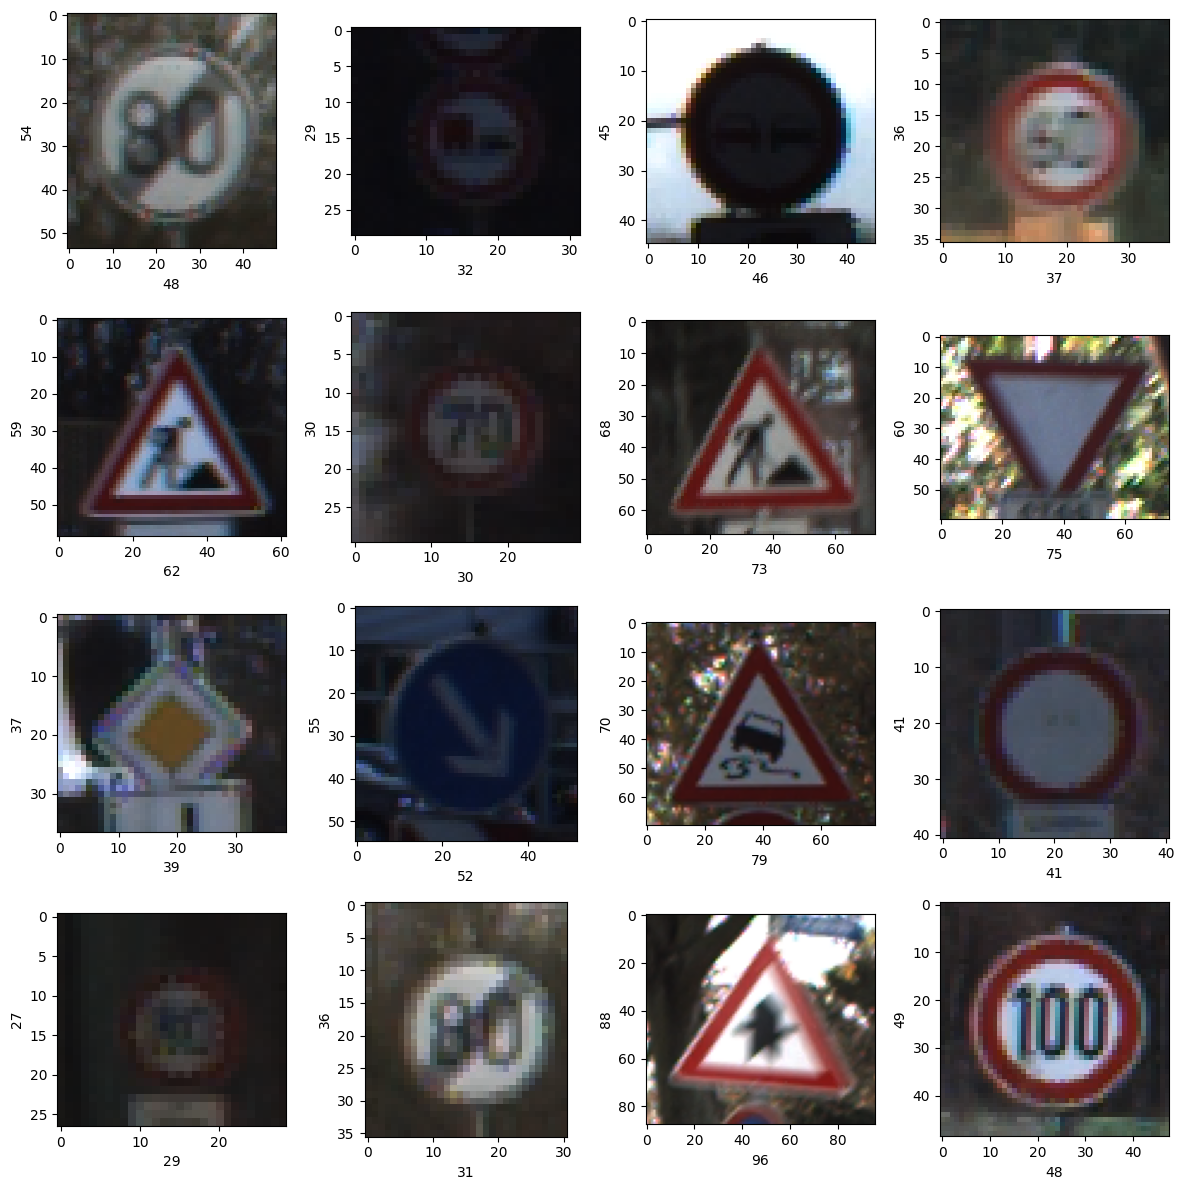

In [ ]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = 'traffic_sign_dataset/Test'
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize=10)#width of image
  plt.ylabel(rand_img.shape[0], fontsize=10)#height of image

Visualizing some images of traffic sign from the test dataset. we can see here the dimension of image are uneven.

In [ ]:
#As size of images are different we have to make them equal so we will take mean of dimensions
dim1 = []
dim2 = []

for i in range(0,43):
  labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = imread(labels + '/' + x)
    dim1.append(img.shape[0])
    dim2.append(img.shape[1])

For further processing we will require the images of some dimension. So, we will start storing the dimension of all the images from training dataset from all 43 classes.

In [ ]:
# Printing mean dimension of images
print("Dimension 1 mean : ",np.mean(dim1) ,"Dimension 2 mean : ",np.mean(dim2))

Dimension 1 mean :  50.328929582493814 Dimension 2 mean :  50.83587951745773


Now we will find out the mean value of both the dimensions and analyse them. Here we can see that (50,50) is the average shape for all the images.

In [ ]:
# Now we will reshape the images to (50,50)
images =[]
label_id =[]

for i in range(43):
  labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = Image.open(labels + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)
    label_id.append(i)

Now we will reshape the images into (50,50) and also stored their label ids.

In [ ]:
# Converting images into numpy array
images = np.array(images)
# The pixel value of each image ranges betwwen 0 and 255
# Dividing each image by 255 will scale the values betwwen 0 and 1 . this is also known as normalization.
images = images/255

Now we will convert all the images into numpy and normalize them.

In [ ]:
label_id = np.array(label_id)
label_id.shape

(39209,)

Storing the label ids into numpy array and printing the shape. Here we can observe that there are 39209 lebel ids.

In [ ]:
images.shape

(39209, 50, 50, 3)

Checking the shape of the images. Here we can see that there are 39209 images with a shape of (50.50,3)

In [ ]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

,count
0,
2,2250
1,2220
13,2160
12,2100
38,2070


Now we will observe images per class for checking the data is balanced or not . From the result we can say that data is balanced.

In [ ]:
# Spliting the data
x_train, x_val, y_train, y_val = train_test_split(images, label_id, test_size=0.2, random_state=42)

The next step would be to split the data into taining and validation with 80% of training data and 20% of validation data.

In [ ]:
#keras has a built-in function for one-hot encoding.
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

Converting the classes column into catagorical using to_catagorical() function.

In [ ]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=x_train.shape[1:], padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(43, activation='softmax'))

Defining the model aarchitecture. In this we will define all the layers with their input shape kernel size, activation, etc.

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 50, 50, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 25, 25, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,224,043 (4.67 MB)

 Trainable params: 1,224,043 (4.67 MB)

 Non-trainable params: 0 (0.00 B)

Computing the model using metrics, optimizar and loss as required and printing out the summary of the model.

In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val),verbose=2)

Epoch 1/10
246/246 - 291s - 1s/step - accuracy: 0.9813 - loss: 0.0581 - val_accuracy: 0.9894 - val_loss: 0.0391
Epoch 2/10
246/246 - 284s - 1s/step - accuracy: 0.9811 - loss: 0.0585 - val_accuracy: 0.9934 - val_loss: 0.0306
Epoch 3/10
246/246 - 264s - 1s/step - accuracy: 0.9830 - loss: 0.0534 - val_accuracy: 0.9940 - val_loss: 0.0263
Epoch 4/10
246/246 - 316s - 1s/step - accuracy: 0.9848 - loss: 0.0495 - val_accuracy: 0.9930 - val_loss: 0.0293
Epoch 5/10
246/246 - 263s - 1s/step - accuracy: 0.9872 - loss: 0.0398 - val_accuracy: 0.9926 - val_loss: 0.0288
Epoch 6/10
246/246 - 258s - 1s/step - accuracy: 0.9861 - loss: 0.0432 - val_accuracy: 0.9931 - val_loss: 0.0255
Epoch 7/10
246/246 - 264s - 1s/step - accuracy: 0.9874 - loss: 0.0377 - val_accuracy: 0.9944 - val_loss: 0.0281
Epoch 8/10
246/246 - 319s - 1s/step - accuracy: 0.9887 - loss: 0.0340 - val_accuracy: 0.9944 - val_loss: 0.0270
Epoch 9/10
246/246 - 263s - 1s/step - accuracy: 0.9879 - loss: 0.0378 - val_accuracy: 0.9945 - val_loss:

Now we will fit the model and observe how our is getting trained on each epoch.

<Axes: >

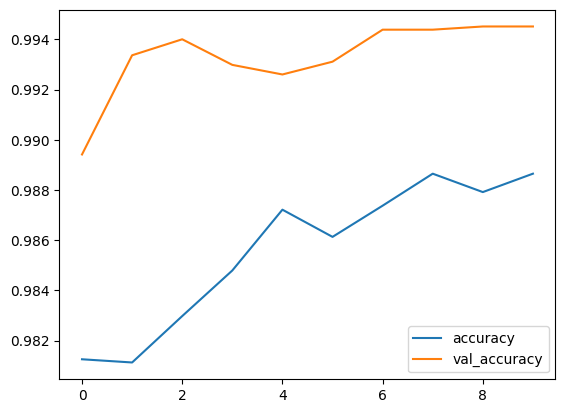

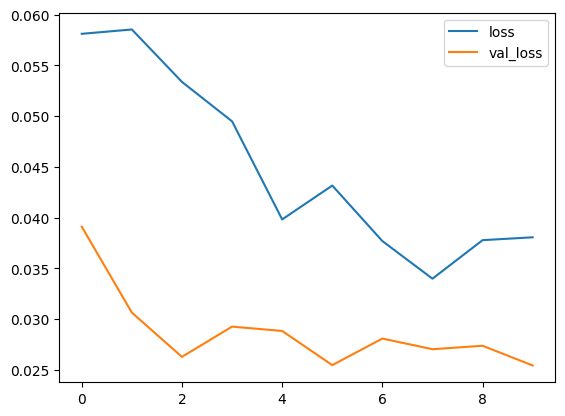

In [ ]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy','val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

Next we will visualize the accuracy and loss per epoch. For this we will store the model history in the pandas dataframe and plot them.

In [ ]:
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

Creating the variable which has path of test dataset. As we downloaded the dataset we found out that their is a GT-final_test.csv file in the test images folder which cannot be processed.So we will remove the file.

In [ ]:
#defining a function that will scale images
from PIL import Image
import numpy as np # import numpy

def scaling(test_images, test_path):
    images = []  # Initialize images as a list

    image_path = test_images

    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50, 50))
        img = np.array(img)
        images.append(img)  # Append to the list

    # Convert images to a NumPy array outside the loop
    images = np.array(images)

    # The pixel value of each image ranges between 0 and 255
    # Dividing each image by 255 will scale the value between 0 and 1. This is also known as normalization.
    images = images / 255
    return images

Next step would we creating a function to resize the test images converting them into a numpy array and normalize them.

In [ ]:
test_images = scaling(sorted(os.listdir(test_path)), test_path)

Calling the above created function on test images.

In [ ]:
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

Next we will read label ids from Test.csv and stored the values of teh class id in y_test variable.

In [ ]:
import numpy as np

# Instead of:
# y_pred = model.predict_classes(test_images)

# Use the following:
y_pred = np.argmax(model.predict(test_images), axis=-1)
# This line predicts the probabilities using `model.predict`
# and then finds the class with the highest probability using `np.argmax` along the last axis (axis=-1).

y_pred

395/395 ━━━━━━━━━━━━━━━━━━━━ 25s 63ms/step


array([16,  1, 38, ..., 20,  7, 10])

Now we will use the model to make predictions on our test images and save them in y_pred.

In [ ]:
# Storing all labels
all_lables = ['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vechiles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vechiles', 'Vechiles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vechiles over 3.5 metric']

Storing the labels according to the images classes.

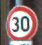

In [ ]:
# Visualize the test image
img = Image.open(test_path + '/00001.png')
img

Let's visualize test image.

In [ ]:
# Original label.
print("Original label: ", all_lables[y_test[1]])

Original label:  Speed limit (30km/h)


Finding out original label for the image above.

In [ ]:
# Predicted label.
print("Predicted label: ", all_lables[y_pred[1]])

Predicted label:  Speed limit (30km/h)


Finding out the prediction label for the images above

**Conclusion**:
We started with downloading the dataset, preprocessing it, created the model and found out the predictions using the model. During preprocessing we found that this dataset has 43 classes. Model reached an accuracy of 95%+ in just 50 epochs, we can further optimize model using hyper parameter tuning and reach a higher accuracy.

→ **Scope**:
This model can be used in self driving cars which will enable them to automatically recognize traffic signs similarly the driver alert system inside cars will help and protect drivers by understanding the traffic signs around them.